# Stock Technical Analysis Exercise 

Using Yahoo Finance we will fetch historic stock price for McDonalds, also you could try any other stock, and visualize the trends.

Exercise Goals & Objectives:
- Learn and prctice Pandas
- Practice Matplotlib

# 1. Import all necessary libriaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Using the URL fetch McDonald's Corporation (MCD) historic prices using pd.read_csv() function

Hint: Use the provided solution, just run through the cells

In [7]:
stock = "MCD"

In [8]:
url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1612537480&period2=1644073480&interval=1d&events=history&includeAdjustedClose=true"

In [9]:
path = url.format(stock)
path

'https://query1.finance.yahoo.com/v7/finance/download/MCD?period1=1612537480&period2=1644073480&interval=1d&events=history&includeAdjustedClose=true'

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,212.589996,214.179993,212.009995,212.580002,207.821732,2600200
1,2021-02-08,212.529999,212.990005,209.960007,211.580002,206.844131,2696200
2,2021-02-09,212.070007,216.179993,211.770004,215.979996,211.145615,3047300
3,2021-02-10,216.880005,217.309998,213.809998,214.399994,209.600983,3161600
4,2021-02-11,214.539993,214.800003,212.399994,214.270004,209.473892,2583600


# 3. Drop the cloumn "Close" because we will be working with "Adj Close"

In [12]:
df.drop("Close", axis=1, inplace=True)

# 4. Rename the column "Adj Close" to "MCD_Close"

In [13]:
df.rename(columns = {'Adj Close':'MCD_Close'}, inplace = True)

# 5. Calculate 50 Day Moving avarage useing rolling() and mean() save the results in the new column "MA"

Hint: use the DataFrame methods rolling() and mean()

In [14]:
df["MA"] = df["MCD_Close"].rolling(50).mean()

# 6. How many rows have NaN (Missing values)

In [15]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
MCD_Close     0
Volume        0
MA           49
dtype: int64

# 7. Remove all rows with NaN

In [16]:
df.dropna(inplace=True)

# 8. Convert the values in the column Date to datetime objects using apply() pd.to_datetime()

In [17]:
df["Date"] = df["Date"].apply(pd.to_datetime)

In [13]:
# aternative method
# df["Date"] = df["Date"].astype("datetime64[ns]")

# 9. When was the highest Closing price in the "MCD_Close" column

In [18]:
max_price = df["MCD_Close"].max()
condition = df["MCD_Close"] == max_price
top = df[condition][["Date","MCD_Close"]]
top

,Date,MCD_Close
232,2022-01-06,269.690002


# 10. When was the lowest Closing price in the MCD_Close columnn

In [19]:
min_price = df["MCD_Close"].min()
low = df[df["MCD_Close"] == min_price][["Date","MCD_Close"]]
low

,Date,MCD_Close
66,2021-05-12,224.209015


# 11. Plot "MCD_Close" and "MA" values as a line using matplotlib style and add title and x y axis anotation

```
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
```

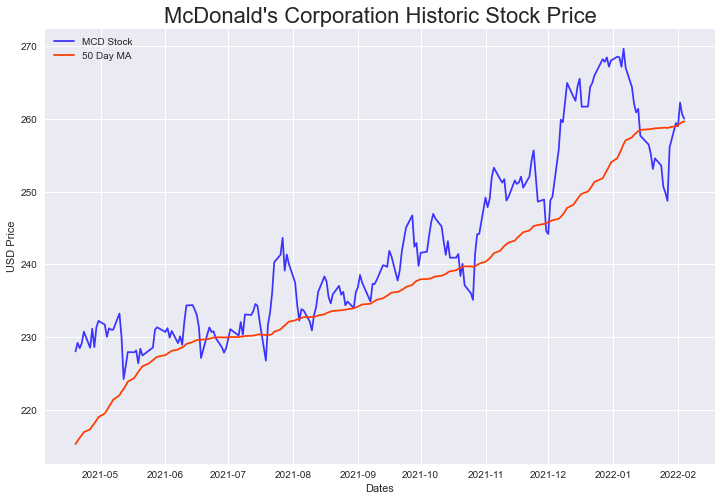

In [20]:
#adding style and setting dimensions
plt.style.use("seaborn")
plt.figure(figsize=(12,8))
#plotting data
plt.plot(df["Date"], df["MCD_Close"], color="#3C33FF", label="MCD Stock")
plt.plot(df["Date"], df["MA"], color="#FF3C02", label="50 Day MA")
# annotation
plt.legend()
plt.xlabel("Dates")
plt.ylabel("USD Price")
plt.title("McDonald's Corporation Historic Stock Price", fontsize=22);

# 12. Mark the top and low prices on the plot with red markers

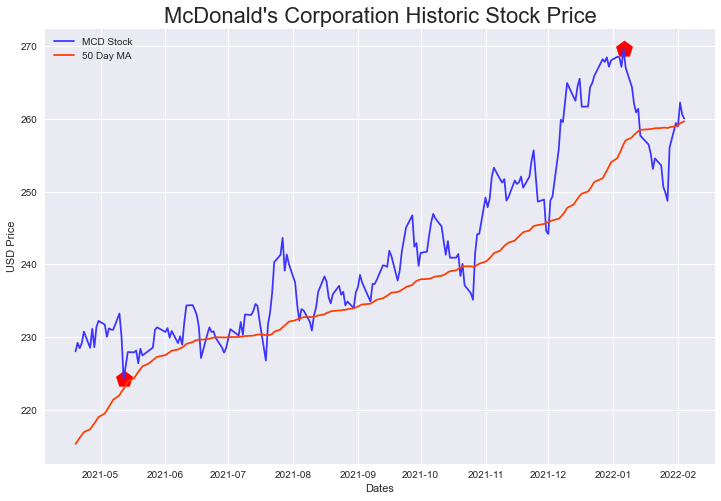

In [21]:
plt.style.use("seaborn")
plt.figure(figsize=(12,8))
#plotting data
plt.plot(df["Date"], df["MCD_Close"], color="#3C33FF", label="MCD Stock")
plt.plot(df["Date"], df["MA"], color="#FF3C02", label="50 Day MA")
plt.scatter(top["Date"], top["MCD_Close"], marker="p", color="red", s=300 )
plt.scatter(low["Date"], low["MCD_Close"], marker="p", color="red", s=300 )
plt.legend()
plt.xlabel("Dates")
plt.ylabel("USD Price")
plt.title("McDonald's Corporation Historic Stock Price", fontsize=22);

# 13. Calculate historic (daily) returns and save them as returns, use function pct_change()

In [22]:
returns = df["MCD_Close"].pct_change(periods=1)

# 14. Get rid of NaNs in returns 

In [23]:
returns.dropna(inplace=True)

# 15. Plot MCD daily returns as Histogram

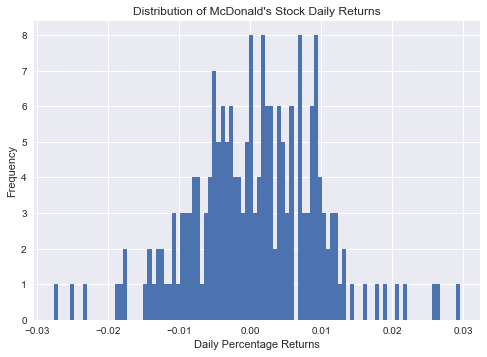

In [24]:
plt.hist(returns, bins=100)
plt.title("Distribution of McDonald's Stock Daily Returns")
plt.xlabel('Daily Percentage Returns')
plt.ylabel('Frequency');

# 16. Save the histogram plot as png and pdf files use plt.savfig() as the last statement in the same cell where your plot is

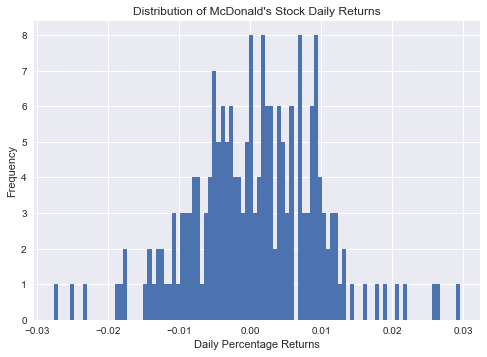

In [25]:
plt.hist(returns, bins=100)
plt.title("Distribution of McDonald's Stock Daily Returns")
plt.xlabel('Daily Percentage Returns')
plt.ylabel('Frequency');
plt.savefig("MCD returns.png")
plt.savefig("MCD returns.pdf")